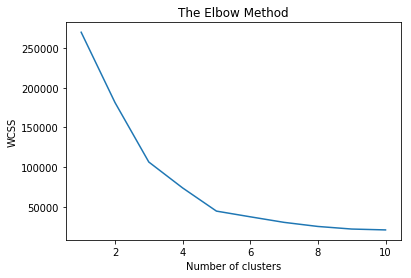

In [24]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, 3:5].values   # Annual Income (k$) and Spending Score (1-100)

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

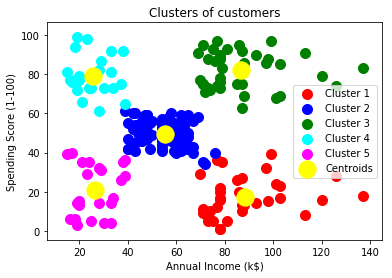

In [25]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

##  階層式分群

In [34]:
# 聚合式階層分群法 (Bottom-up, Agglomerative Clustering)
from sklearn.cluster import AgglomerativeClustering
aggc = AgglomerativeClustering(linkage='ward',n_clusters=5) # 集群聚合後的變異/距離平⽅和為最⼩, 也可選擇average或complete

y_pred = aggc.fit_predict(X)

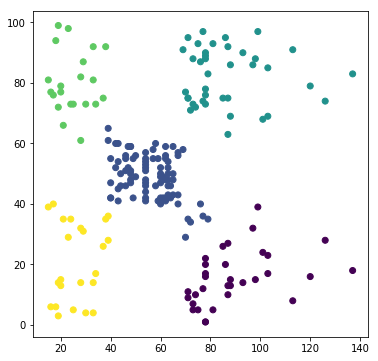

In [35]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

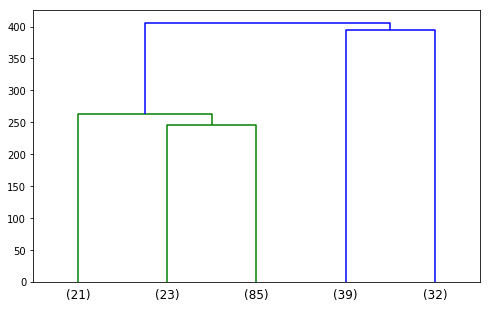

In [37]:
# 階層樹狀圖, 使用scipy
# scipy.cluster.hierarchy.linkage
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
# scipy.cluster.hierarchy.dendrogram
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
# p: 集群數
# truncate_mode: 階層樹太大可讀性低，可利用此參數裁剪
# show_leaf_counts: 顯示樹葉分群數量

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(8, 5))
linkage_matrix = linkage(X, "ward") 
tree = dendrogram(linkage_matrix, p=5, truncate_mode='lastp', show_leaf_counts=True)
plt.show()

## DBSCAN

In [38]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)   # 可調整：eps(半徑)、min_samples(半徑內最少邊緣點數量)
y_pred_dbscan = dbscan.fit_predict(X)

from sklearn.cluster import AgglomerativeClustering
aggc = AgglomerativeClustering(linkage='ward',n_clusters=5)
y_pred_aggc = aggc.fit_predict(X)

from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
y_pred_km = km.fit_predict(X)

Text(0.5,1,'KMeans')

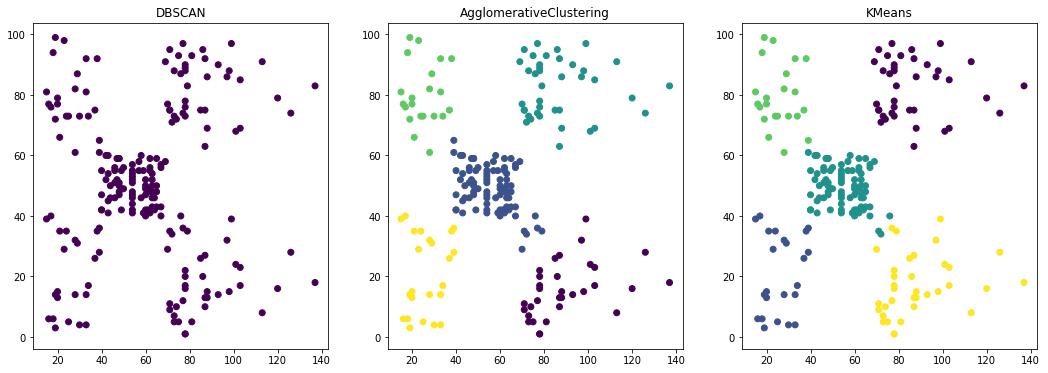

In [39]:
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_dbscan)
plt.title('DBSCAN')

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_aggc)
plt.title('AgglomerativeClustering')

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_km)
plt.title('KMeans')